<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Зададим-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Зададим-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Оценим-окупаемость-рекламы" data-toc-modified-id="Оценим-окупаемость-рекламы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценим окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Общая-окупаемость-рекламы" data-toc-modified-id="Общая-окупаемость-рекламы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Общая окупаемость рекламы</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-каналам-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по каналам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-для-пользователей-из-США-с-разбивкой-по-каналам" data-toc-modified-id="Окупаемость-рекламы-для-пользователей-из-США-с-разбивкой-по-каналам-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Окупаемость рекламы для пользователей из США с разбивкой по каналам</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование бизнес-показателей приложения Procrastinate Pro+

Аналитика для развлекательного приложения Procrastinate Pro+. 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель исследования**— разобраться в причинах убытков и помочь компании выйти в плюс.

**Ход исследования:**
1. Обзор данных
1. Предобработка данных
1. Изучить откуда приходят пользователи и какими устройствами они пользуются,
1. Изучить сколько стоит привлечение пользователей из различных рекламных каналов;
1. Изучить сколько денег приносит каждый клиент,
1. Изучить когда расходы на привлечение клиента окупаются,
1. Изучить какие факторы мешают привлечению клиентов.

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# импортируем функции для работы со временем
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# загружаем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# получение общей информации о данных в таблице визиты
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 'visits' 6 столбцов, 309901 строка. В каждой строке информация об одной сессии пользователя. Типы данных int64(1), object(5).

In [4]:
# получение общей информации о данных в таблице заказы
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 'orders' 3 столбца, 40212 строк. В каждой строке информация об одном заказе пользователя. Типы данных float64(1), int64(1), object(1).

In [5]:
# получение общей информации о данных в таблице расходы
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 'ad_costs' 3 столбца, 1800 строк. В каждой строке информация об одной рекламной компании. Типы данных float64(1), object(2).

**План предобработки**

- Привести название столбцов к единому формату
- Столбцы с датой перевести в формате datetime

## Предобработка данных

In [6]:
# Преведим название столбцов к змеиному регистру
list_df = [visits, orders, ad_costs]

for df in list_df:
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

In [7]:
# столбцы с датой приведем в формате datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [8]:
# проверим дубликаты и пропуски в таблице visits
print('Количество дубликатов в таблице visits - ',visits.duplicated().sum())
print('Количество пропусков в таблице visits')
print(visits.isna().sum())

Количество дубликатов в таблице visits -  0
Количество пропусков в таблице visits
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64


In [9]:
# проверим дубликаты и пропуски в таблице orders
print('Количество дубликатов в таблице orders - ',orders.duplicated().sum())
print('Количество пропусков в таблице orders')
print(orders.isna().sum())

Количество дубликатов в таблице orders -  0
Количество пропусков в таблице orders
user_id     0
event_dt    0
revenue     0
dtype: int64


In [10]:
# проверим дубликаты и пропуски в таблице ad_costs
print('Количество дубликатов в таблице ad_costs - ',ad_costs.duplicated().sum())
print('Количество пропусков в таблице ad_costs')
print(ad_costs.isna().sum())

Количество дубликатов в таблице ad_costs -  0
Количество пропусков в таблице ad_costs
dt         0
channel    0
costs      0
dtype: int64


In [69]:
visits.query('session_start > session_end')['user_id'].count()

0

In [ ]:
orders['revenue'].nunique()

**Вывод после предобработки данных**

Привели название столбцов в таблицах к единому виду, столбцы с датами перевели в формат datetime. Проверили таблицы на пропуски и дубликаты, пропусков и дубликатов не обнаружено. Данные готовы к анализу.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

In [19]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, ad_costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
# определим минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения пользователей -',profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей -',profiles['first_ts'].max())

Минимальная дата привлечения пользователей - 2019-05-01 00:00:41
Максимальная дата привлечения пользователей - 2019-10-27 23:59:04


Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Значит данных для анализа хватит.

In [21]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
profiles_region = profiles.pivot_table(index='region',columns='payer',aggfunc='nunique', values='user_id')

region_size = (
   profiles.groupby('region')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'all_users'})
)

profiles_region = region_size.merge(
    profiles_region, on='region', how='left'
)
profiles_region = profiles_region.div(
    profiles_region['all_users'], axis=0
).drop(columns=['all_users'])

profiles_region = region_size.merge(
    profiles_region, on='region', how='left'
).drop(columns=[False]).rename(columns={True : 'share_of_paying, %'})

profiles_region['share_of_paying, %'] = round(profiles_region['share_of_paying, %']*100,2)

profiles_region = profiles_region.sort_values(by='share_of_paying, %',ascending=False)

display(profiles_region)

,all_users,"share_of_paying, %"
region,,
United States,100002,6.90
Germany,14981,4.11
UK,17575,3.98
France,17450,3.80


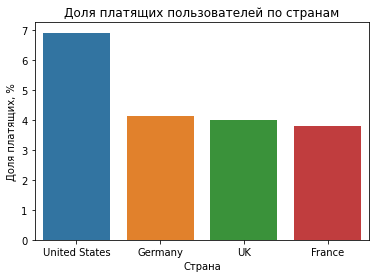

In [22]:
ax = sns.barplot(data=profiles_region, y="share_of_paying, %", x=profiles_region.index)
ax.set_title('Доля платящих пользователей по странам')
ax.set(xlabel='Страна', ylabel='Доля платящих, %')
plt.show()

Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего зарегистрировано пользователей из США, среди них также самая большая доля платящих, 6,9%. У остальных стран доля платящих около 4%.

In [23]:
# построим таблицу, отражающую количество пользователей и долю платящих по устройствам.
profiles_device = profiles.pivot_table(index='device',columns='payer',aggfunc='nunique', values='user_id')
device_size = (
   profiles.groupby('device')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'all_users'})
)

profiles_device = device_size.merge(
    profiles_device, on='device', how='left'
).fillna(0)

profiles_device = profiles_device.div(
    profiles_device['all_users'], axis=0
).drop(columns=['all_users'])

profiles_device = device_size.merge(
    profiles_device, on='device', how='left'
).drop(columns=[False]).rename(columns={True : 'share_of_paying, %'})

profiles_device['share_of_paying, %'] = round(profiles_device['share_of_paying, %']*100,2)

profiles_device = profiles_device.sort_values(by='share_of_paying, %',ascending=False)
display(profiles_device)

,all_users,"share_of_paying, %"
device,,
Mac,30042,6.36
iPhone,54479,6.21
Android,35032,5.85
PC,30455,5.05


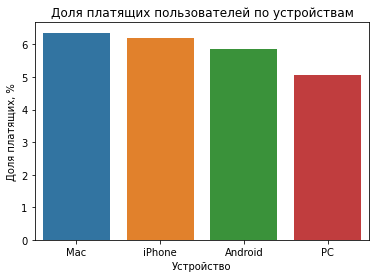

In [24]:
ax = sns.barplot(data=profiles_device, y="share_of_paying, %", x=profiles_device.index)
ax.set_title('Доля платящих пользователей по устройствам')
ax.set(xlabel='Устройство', ylabel='Доля платящих, %')
plt.show()

Клиенты пользуются устройствами Mac, iPhone, Android и PC. Больше всего доля платящих у клиентов, которые пользуются Mac - 6,4%. Меньше всего у тех клиентов, которые пользуются PC - 5%

In [25]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждого канала.
profiles_channel = profiles.pivot_table(index='channel',columns='payer',aggfunc='nunique', values='user_id')
channel_size = (
   profiles.groupby('channel')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'all_users'})
)

profiles_channel = channel_size.merge(
    profiles_channel, on='channel', how='left'
).fillna(0)

profiles_channel = profiles_channel.div(
    profiles_channel['all_users'], axis=0
).drop(columns=['all_users'])

profiles_channel = channel_size.merge(
    profiles_channel, on='channel', how='left'
).drop(columns=[False]).rename(columns={True : 'share_of_paying, %'})

profiles_channel['share_of_paying, %'] = round(profiles_channel['share_of_paying, %']*100,2)

profiles_channel = profiles_channel.sort_values(by='share_of_paying, %',ascending=False)

display(profiles_channel)

,all_users,"share_of_paying, %"
channel,,
FaceBoom,29144,12.20
AdNonSense,3880,11.34
lambdaMediaAds,2149,10.47
TipTop,19561,9.60
RocketSuperAds,4448,7.91
WahooNetBanner,8553,5.30
YRabbit,4312,3.83
MediaTornado,4364,3.57
LeapBob,8553,3.06


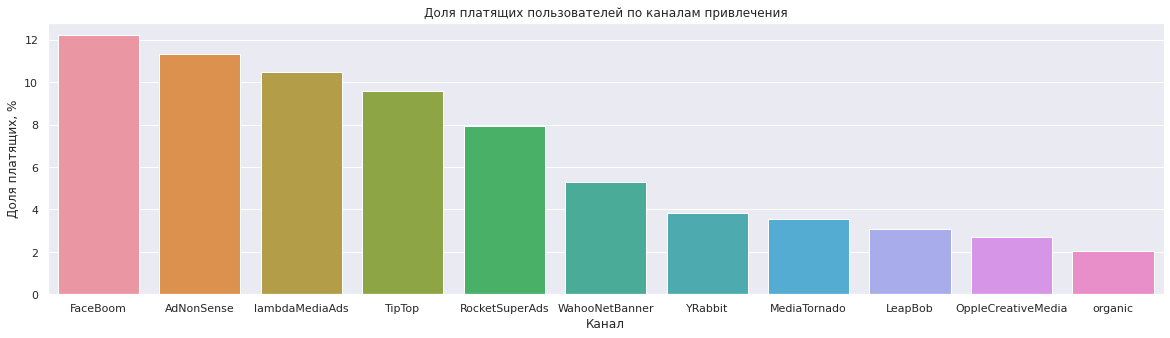

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=profiles_channel, y="share_of_paying, %", x=profiles_channel.index)
ax.set_title('Доля платящих пользователей по каналам привлечения')
ax.set(xlabel='Канал', ylabel='Доля платящих, %')
plt.show()

Больше всего платящих пользователей пришло из FaceBoom, около 12%. На втором месте AdNonSense, около 11%. Замыкает тройку лидеров lambdaMediaAds, около 10%. Меньше всего платящих пользователей приходит из каналов organic, OppleCreativeMedia, LeapBob.

**Вывод**

Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего зарегистрировано пользователей из США, среди них также самая большая доля платящих, 6,9%. У остальных стран доля платящих около 4%.

Клиенты пользуются устройствами Mac, iPhone, Android и PC. Больше всего доля платящих у клиентов, которые пользуются Mac - 6,4%. Меньше всего у тех клиентов, которые пользуются PC - 5%

Больше всего платящих пользователей пришло из FaceBoom, около 12%. На втором месте AdNonSense, около 11%. Замыкает тройку лидеров lambdaMediaAds, около 10%. Меньше всего платящих пользователей приходит из каналов organic, OppleCreativeMedia, LeapBob.

## Маркетинг

In [27]:
# выведм общую сумму расходов на маркетинг.
total_marketing_spend = round(ad_costs['costs'].sum(),2)
print(f'Общая сумма расходов на маркетинг состаляет: {total_marketing_spend}') 

Общая сумма расходов на маркетинг состаляет: 105497.3


In [28]:
# построим таблицу, отражающую распределение трат по рекламным источникам.
spending_ad = (
ad_costs.groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs',ascending=False)
    .rename(columns={'costs' : 'spending'})
)

display(spending_ad)

,spending
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


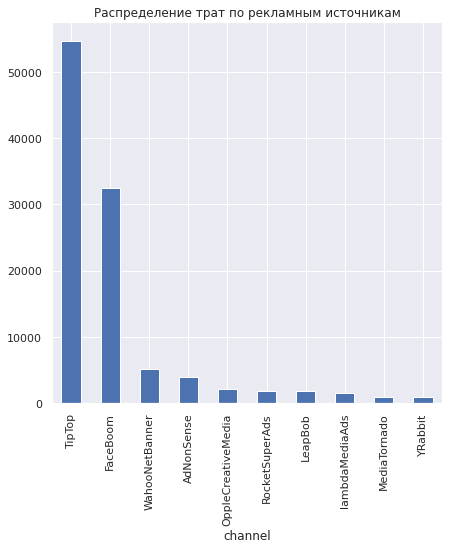

In [29]:
# построим диаграмму, отражающую распределение трат по рекламным источникам.
spending_ad.plot(y='spending', kind='bar', figsize=(7, 7), legend=False)
plt.title('Распределение трат по рекламным источникам')
plt.show()

Больше всего денег потратили на источники TipTop и FaceBoom. На остальные источники приходится меньше четверти  всех трат.

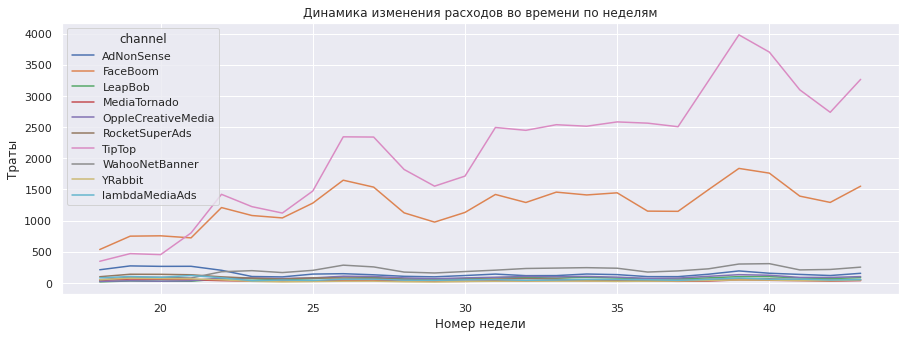

In [30]:
# построим визуализацию динамики изменения расходов во времени по неделям по каждому источнику.
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] =ad_costs['dt'].dt.month

(ad_costs.pivot_table(index='channel', columns='week', aggfunc='sum', values='costs')
         .T.plot(grid=True, figsize=(15, 5))
)
plt.title('Динамика изменения расходов во времени по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Траты')
plt.show()

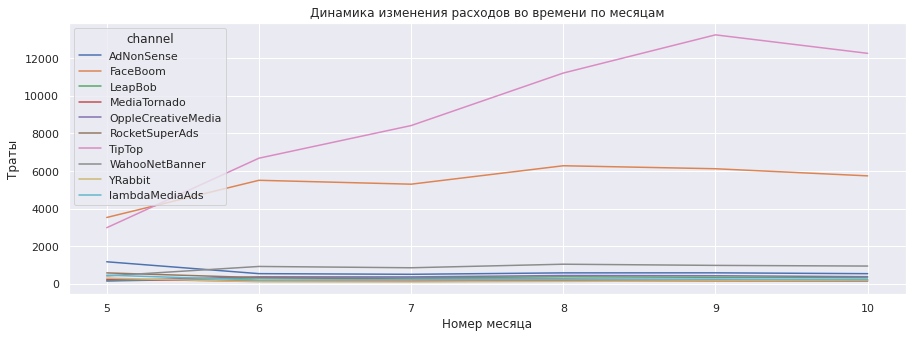

In [31]:
# построим визуализацию динамики изменения расходов во времени по месяцам по каждому источнику.
(ad_costs.pivot_table(index='channel', columns='month', aggfunc='sum', values='costs')
         .T.plot(grid=True, figsize=(15, 5))
)
plt.title('Динамика изменения расходов во времени по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Траты')
plt.show()

Траты на TipTop и FaceBoom существенно превышают траты на остальные источники и растут со временем. Траты на остальные источники остаются стабильными. 

In [32]:
# построим таблицу, стоимости привлечение одного пользователя (CAC) из каждого источника.
channel_cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost')
)
display(channel_cac)

,acquisition_cost
channel,
organic,0.000000
LeapBob,0.210172
MediaTornado,0.218717
YRabbit,0.218975
OppleCreativeMedia,0.250000
RocketSuperAds,0.412095
WahooNetBanner,0.602245
lambdaMediaAds,0.724802
AdNonSense,1.008054


In [33]:
# посчитаем средний САС по проекту
print('Средний CAC по проекту:', round(channel_cac['acquisition_cost'].mean(),3) )

Средний CAC по проекту: 0.687


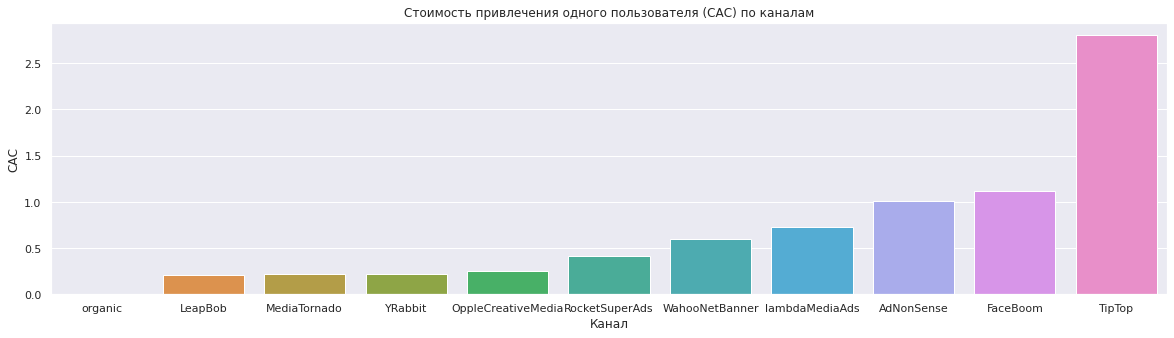

In [34]:
# построим визуализацию стоимости привлечение одного пользователя (CAC) из каждого источника.
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(data=channel_cac, y='acquisition_cost', x=channel_cac.index)
ax.set_title('Стоимость привлечения одного пользователя (САС) по каналам')
ax.set(xlabel='Канал', ylabel='САС')
plt.show()

Стоимость привлечения одного пользователя (CAC) меньше всего в источнике organic, LeapBob, MediaTornado, YRabbit, около 0,2. Самое большая САС в источниках TipTop - 2,7, FaceBoom - 1,1, AdNonSense - 1.	

**Вывод**
- Общая сумма расходов на маркетинг состаляет: 105497.3
- Траты на TipTop и FaceBoom существенно превышают траты на остальные источники и растут со временем. Траты на остальные источники остаются стабильными.
- Средний CAC по проекту: 0.687
- Стоимость привлечения одного пользователя (CAC) меньше всего в источнике LeapBob, MediaTornado, YRabbit, около 0,2. Самое большая САС в источниках TipTop - 2,7, FaceBoom - 1,1, AdNonSense - 1.

## Оценим окупаемость рекламы

In [35]:
# установим момент и горизонт анализа данных. 
observation_date = datetime(2019, 10, 1).date()  # момент анализа, максимальная дата привлечения пользователей
horizon_days = 14 # недельный горизонт анализа
profiles = profiles.query('channel != "organic"') # исключим пользователей, пришедших из органического трафика

### Общая окупаемость рекламы

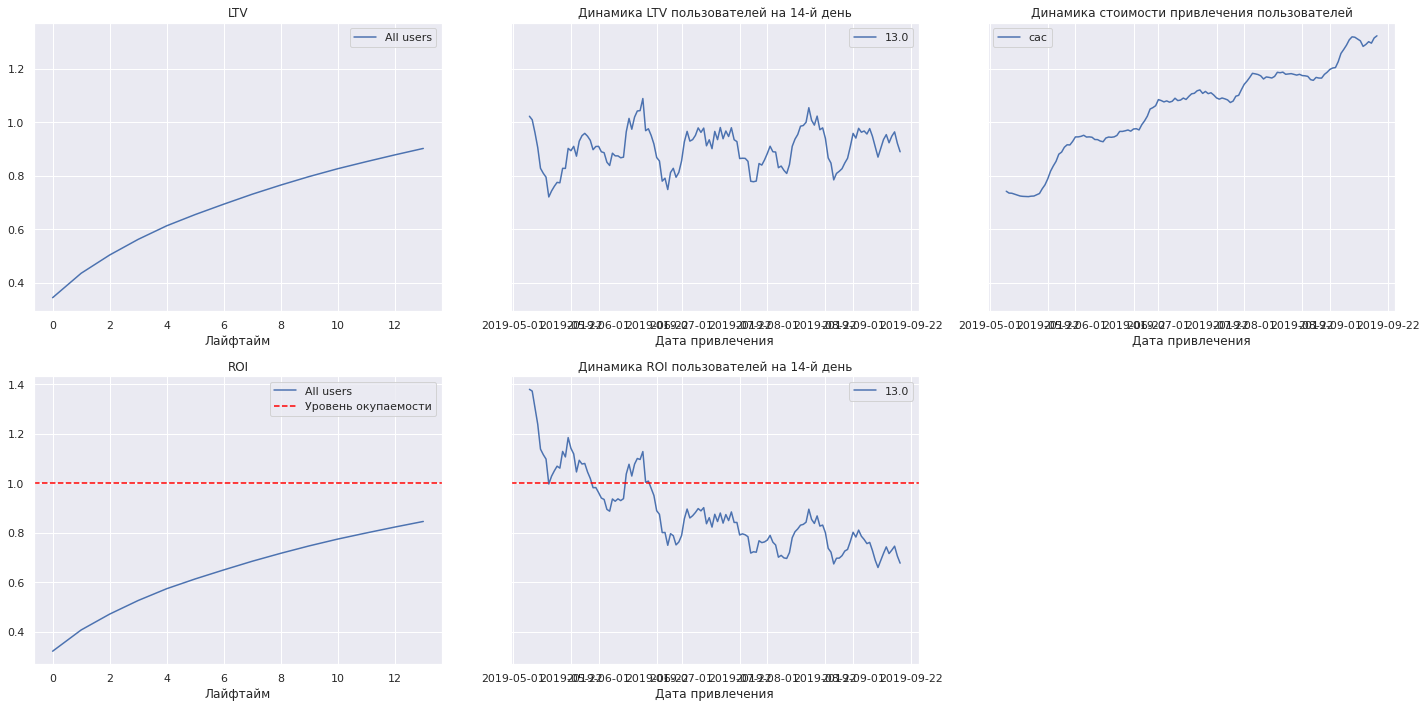

In [36]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце срока — чуть выше 80%.
- Стоимость привлечения увеличивается.
- На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

### Окупаемость рекламы с разбивкой по устройствам

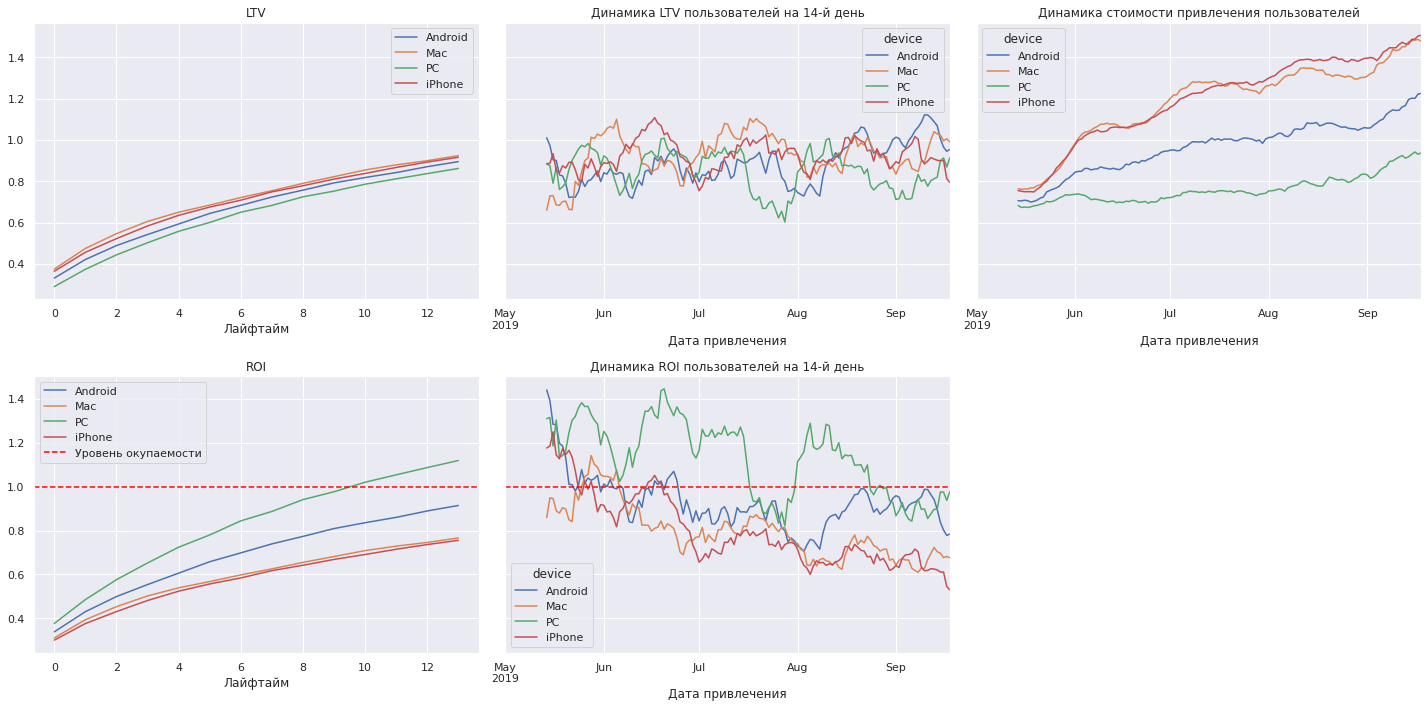

In [37]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:
- Реклама не окупается на всех устройствах, кроме PC.
- Стоимость привлечения постепенно растет. Стоимость привлечения разная для всех устройств, кроме Mac и iPhone.
- LTV всё так же подвержен сезонности, но стабилен.
- Лучше всего окупается PC, хуже всех Mac и iPhone.

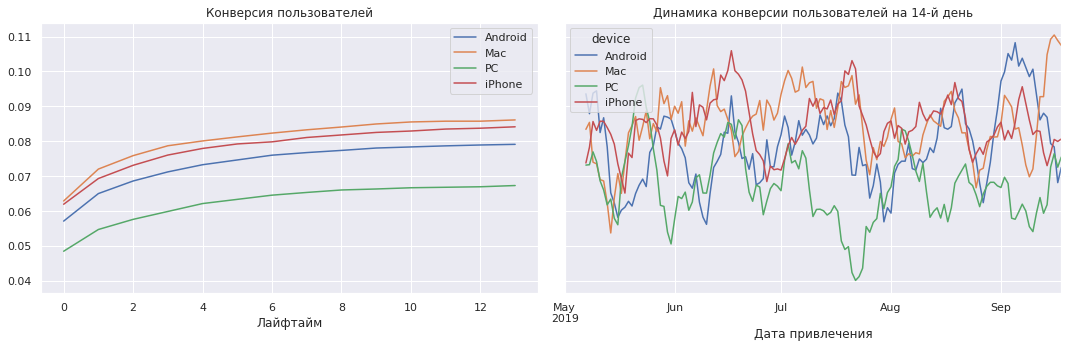

In [38]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше всего конвертируются пользователи Mac и iPhone. Хуже всего пользователи PC.

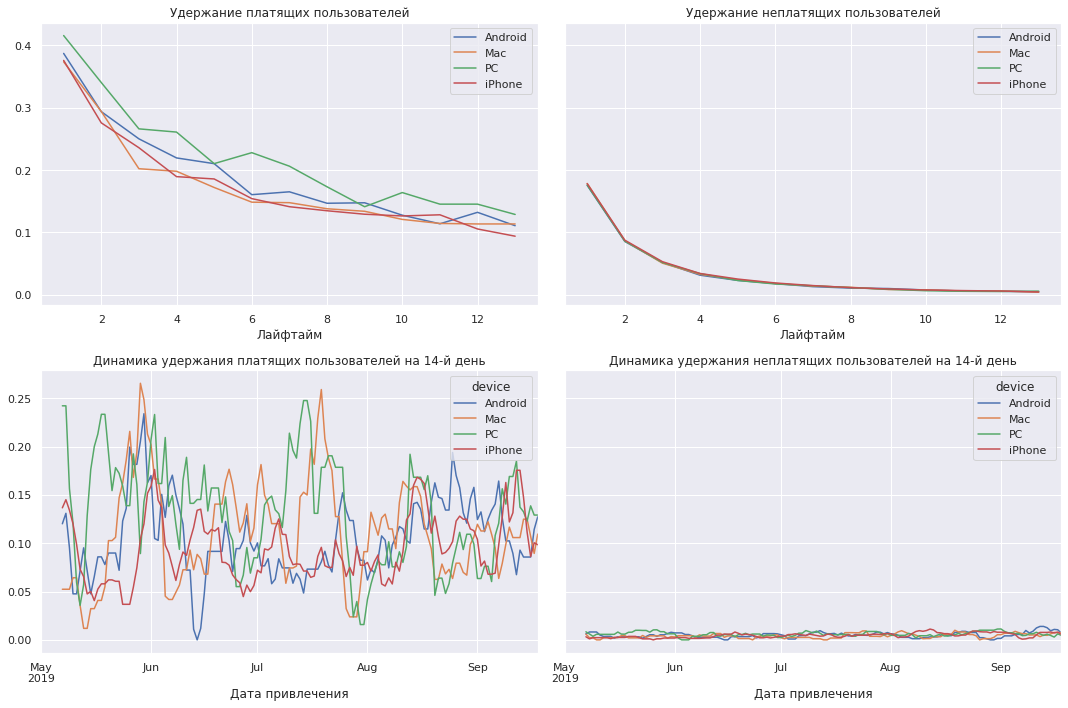

In [39]:
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи удерживаются практически одинаково, устройство не влияет на удержание.

### Окупаемость рекламы с разбивкой по каналам

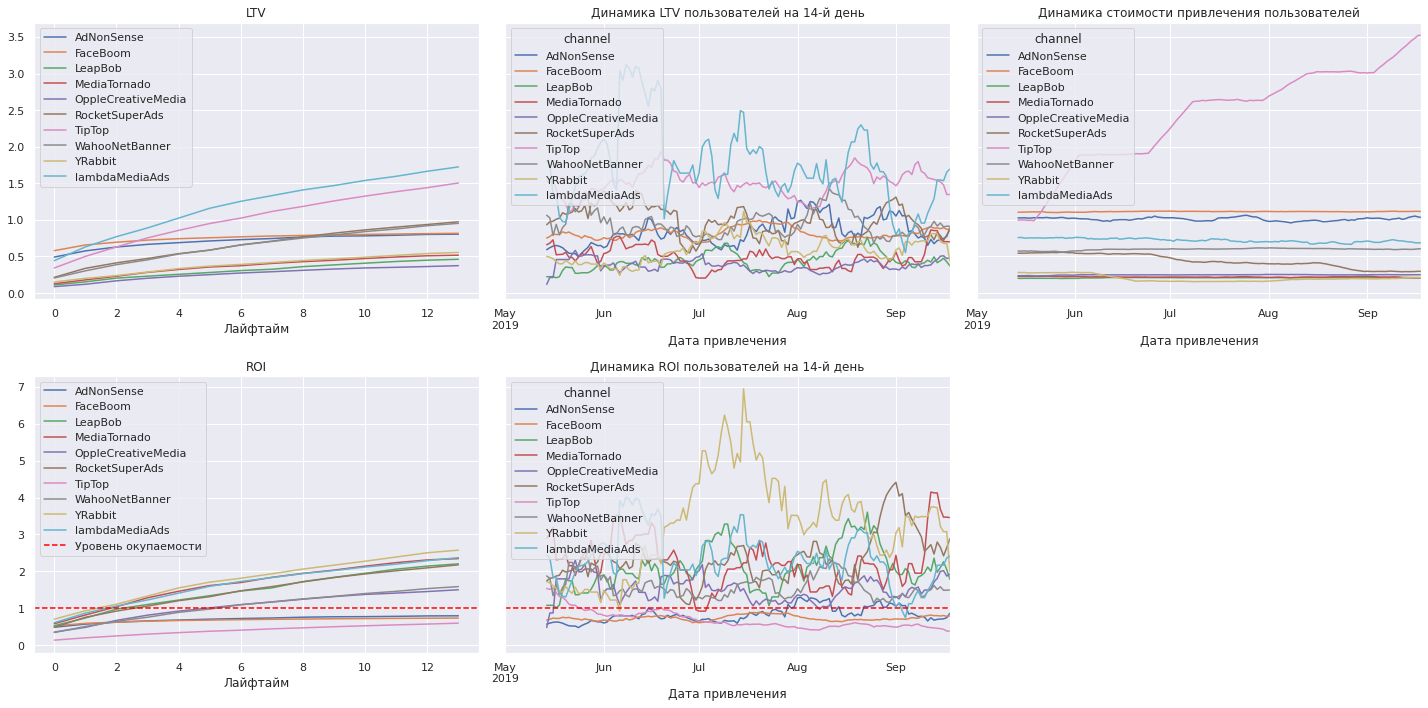

In [40]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:
- Реклама окупается на всех источниках, кроме AdNonSense, FaceBoom, TipTop.
- Стоимость привлечения остается стабильной для всех каналов, кроме TipTop. Стоимость привлечения в TipTop намного больше, чем в других каналах и растет.
- LTV всё так же подвержен сезонности, но стабилен.
- Лучше всего окупается YRabbit, хуже всех TipTop.

Видим, что реклама в источниках AdNonSense, FaceBoom и TipTop не окупается. При этом стоимость привлечения в TipTop растет, а в AdNonSense, FaceBoom нет. Возможно низкая окупаемость TipTop связана с высокой стоимостью привлечения. А для АdNonSense и FaceBoom причина может быть в низкой конверсии или низком удержании.

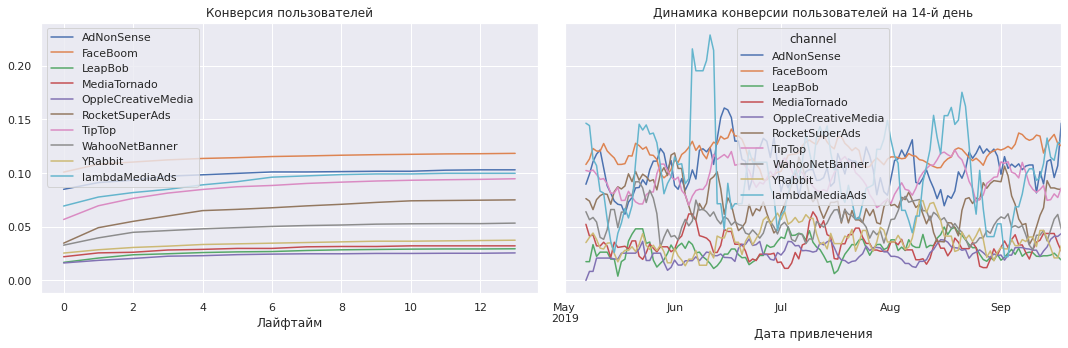

In [41]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из АdNonSense и FaceBoom конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании.

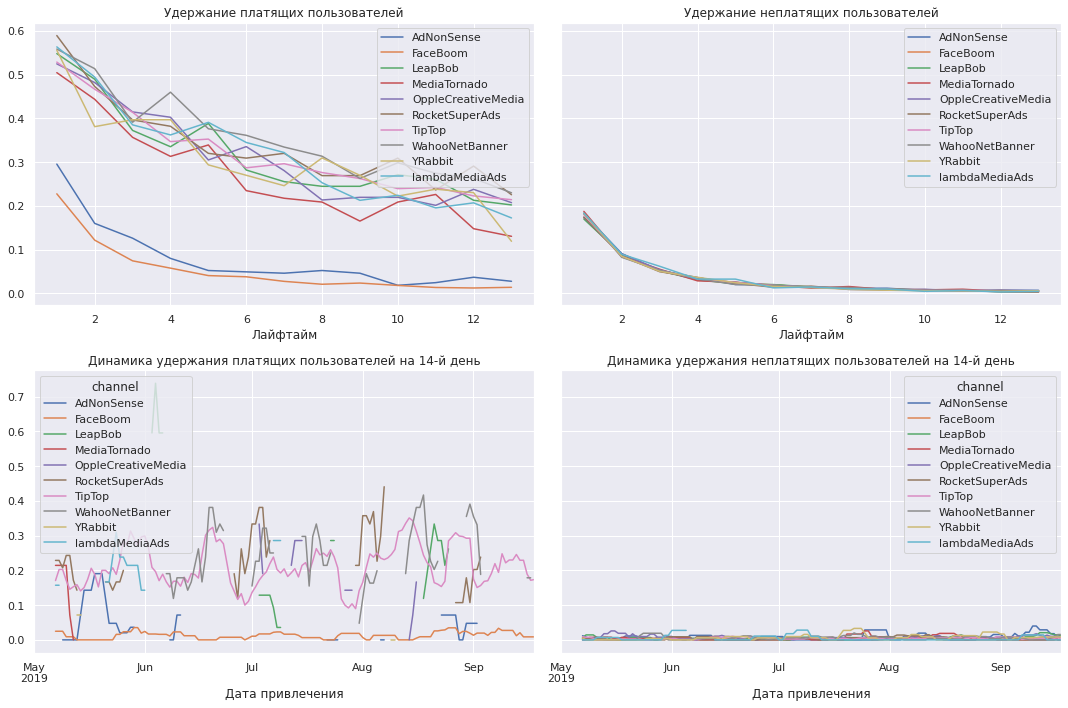

In [42]:
# смотрим удержание с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, пользователи из АdNonSense и FaceBoom стабильно плохо удерживаются. Для платящих пользователей из АdNonSense и FaceBoom удержание 14-го дня ниже, чем из остальных каналов, примерно на 20%. Это очень низкий показатель. 

Можно предположить, что низкая окупаемость рекламы из каналов АdNonSense и FaceBoom связана с низким удержанием пользователей, привлеченных из этих каналов. Низкая окупаемость рекламы из канала TipTop связана с высокой стоимостью привлечения.

### Окупаемость рекламы с разбивкой по странам

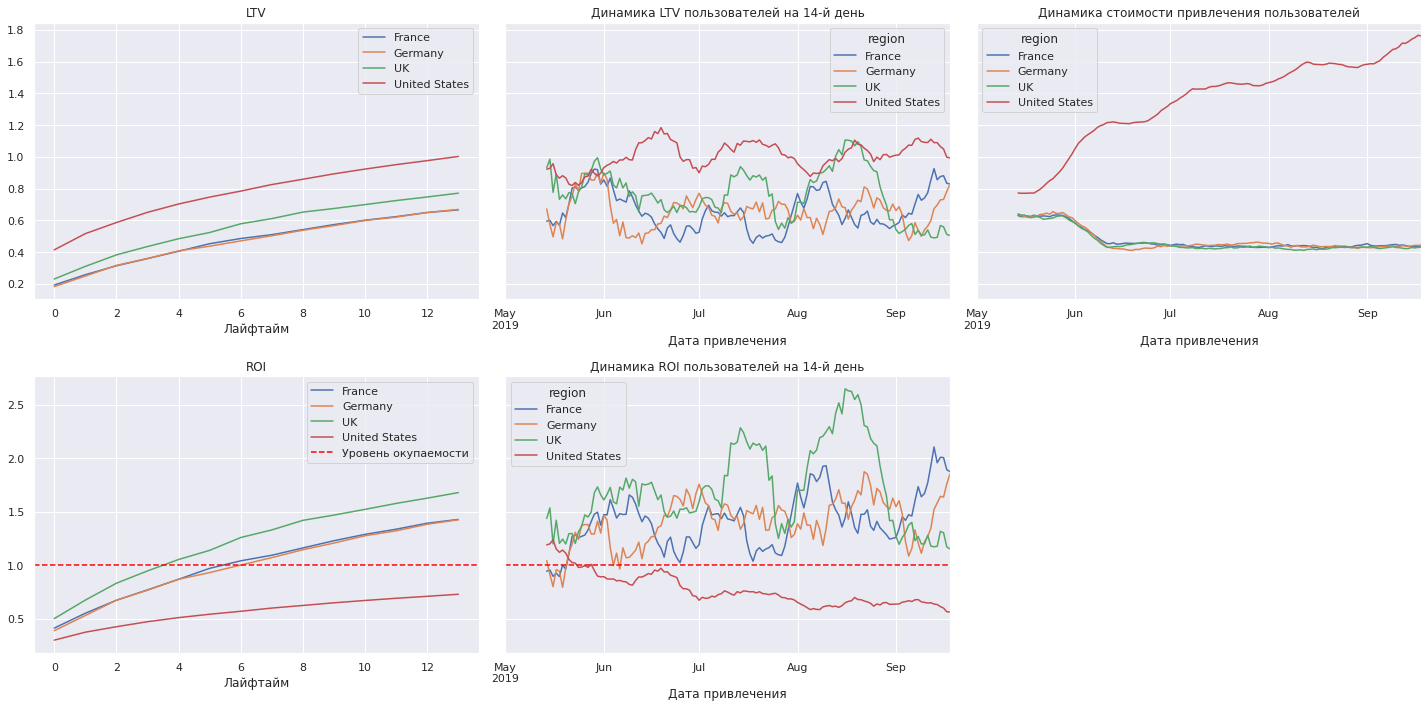

In [43]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики:
- Реклама окупается во всех странах, кроме США.
- Стоимость привлечения остается стабильной для всех стран, кроме США. Для США стоимость привлечения растет и намного превышает остальные страны.
- LTV всё так же подвержен сезонности, но стабилен.
- Лучше всего окупается Великобритания, хуже всех США.

Видим, что пользователи из США не окупаются. При этом стоимость привлечения в США выше, чем у других стран и растет. Проверим также конверсию и удержание с разбивкой по странам.

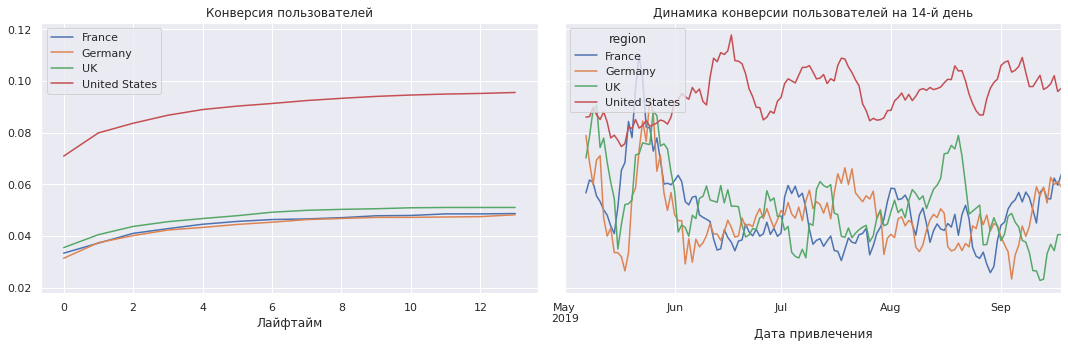

In [44]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из США конвертируются очень хорошо, причём постоянно.

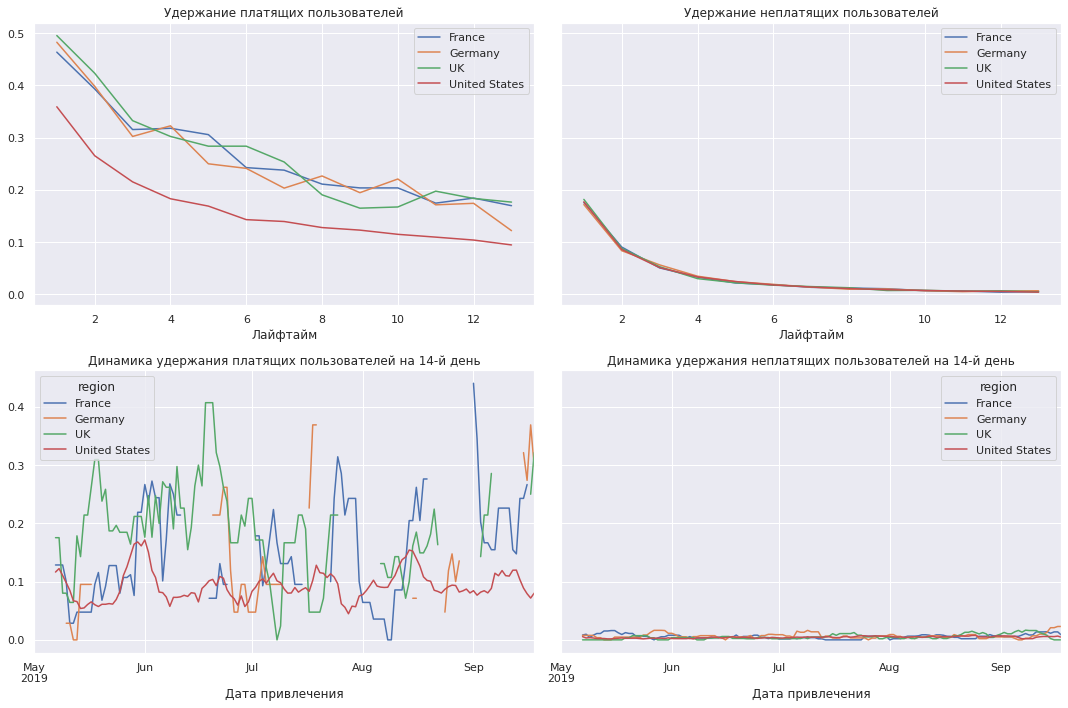

In [45]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США стабильно хуже удерживаются, чем пользователи из других стран. Для платящих пользователей из США удержание 14-го дня ниже, чем из остальных стран, примерно на 7%.

### Окупаемость рекламы для пользователей из США с разбивкой по каналам

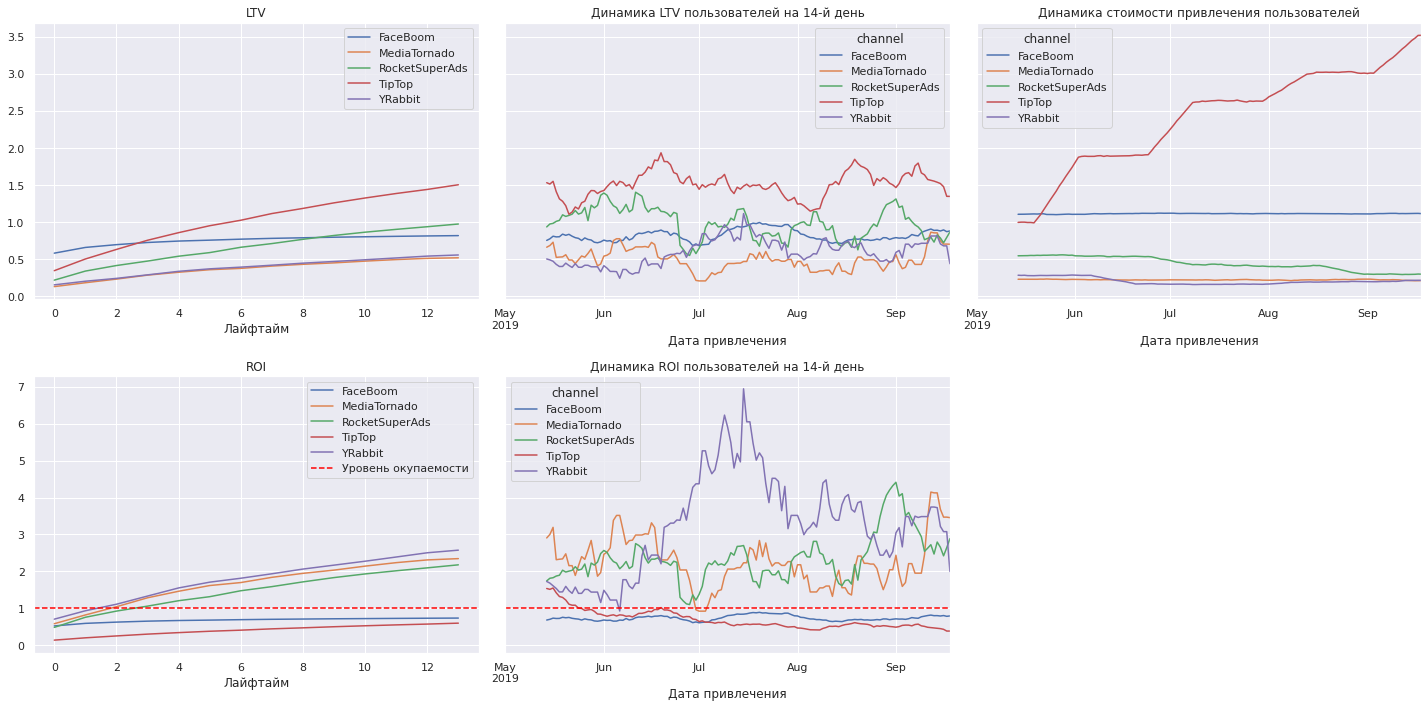

In [46]:
# смотрим окупаемость пользователей из США с разбивкой по каналам
dimensions = ['channel']
profiles_US = profiles.query('region == "United States"')

tv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вот что говорят графики:
- Реклама в США не окупается только в FaceBoom и TipTop.
- Стоимость привлечения в США остается стабильной и немного снижается для всех каналов, кроме TipTop. Для TipTop стоимость привлечения растет и намного превышает остальные каналы.
- LTV стабилен.
- Лучше всего окупается YRabbit, хуже всех TipTop.

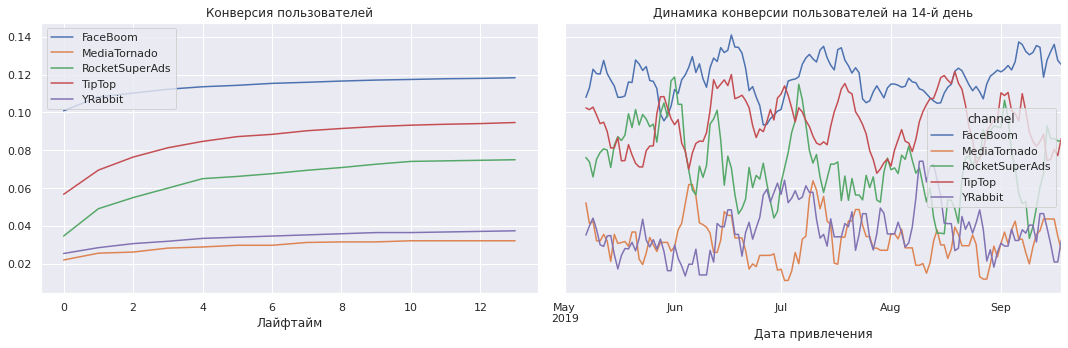

In [47]:
# смотрим конверсию пользователей из США с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США, привлеченные из FaceBoom конвертируются лучше, чем остальные, TipTop на втором месте.

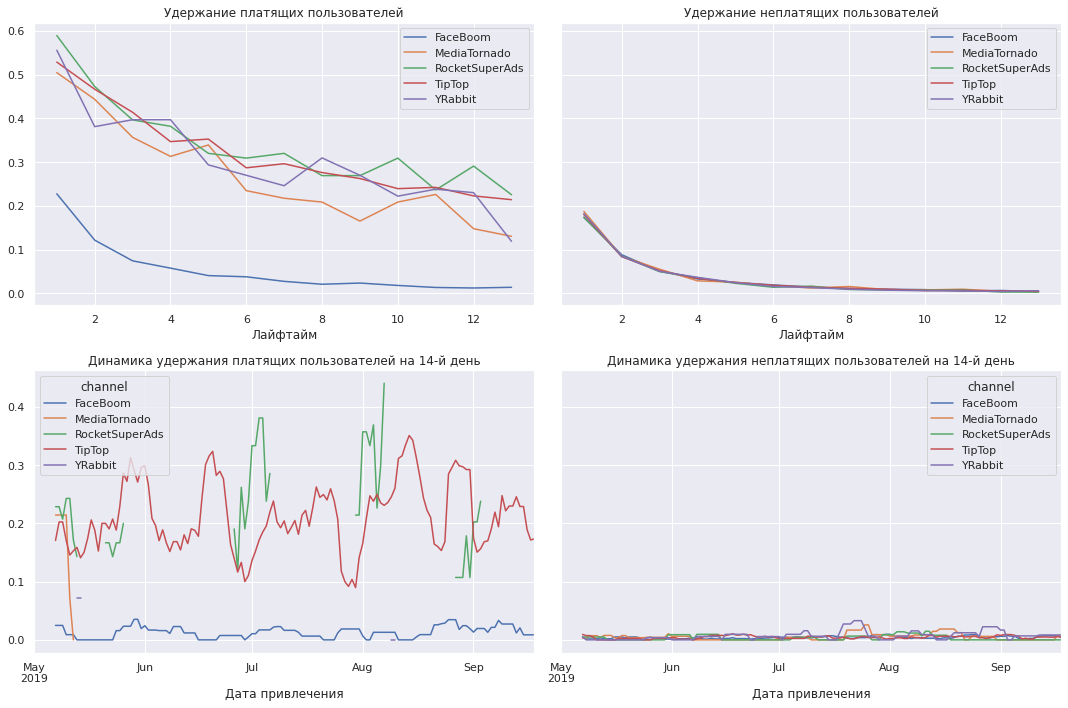

In [48]:
# смотрим удержание пользователей из США с разбивкой по каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_US, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из FaceBoom стабильно хуже удерживаются, чем пользователи из других каналов. Для платящих пользователей FaceBoom удержание 7-го дня ниже, чем из остальных каналов, примерно на 20%.

Можно сделать вывод, что на низкую окупаемость пользователей из США влияет высокая стоимость привлечения в TipTop и низкое удержание пользователей из FaceBoom.

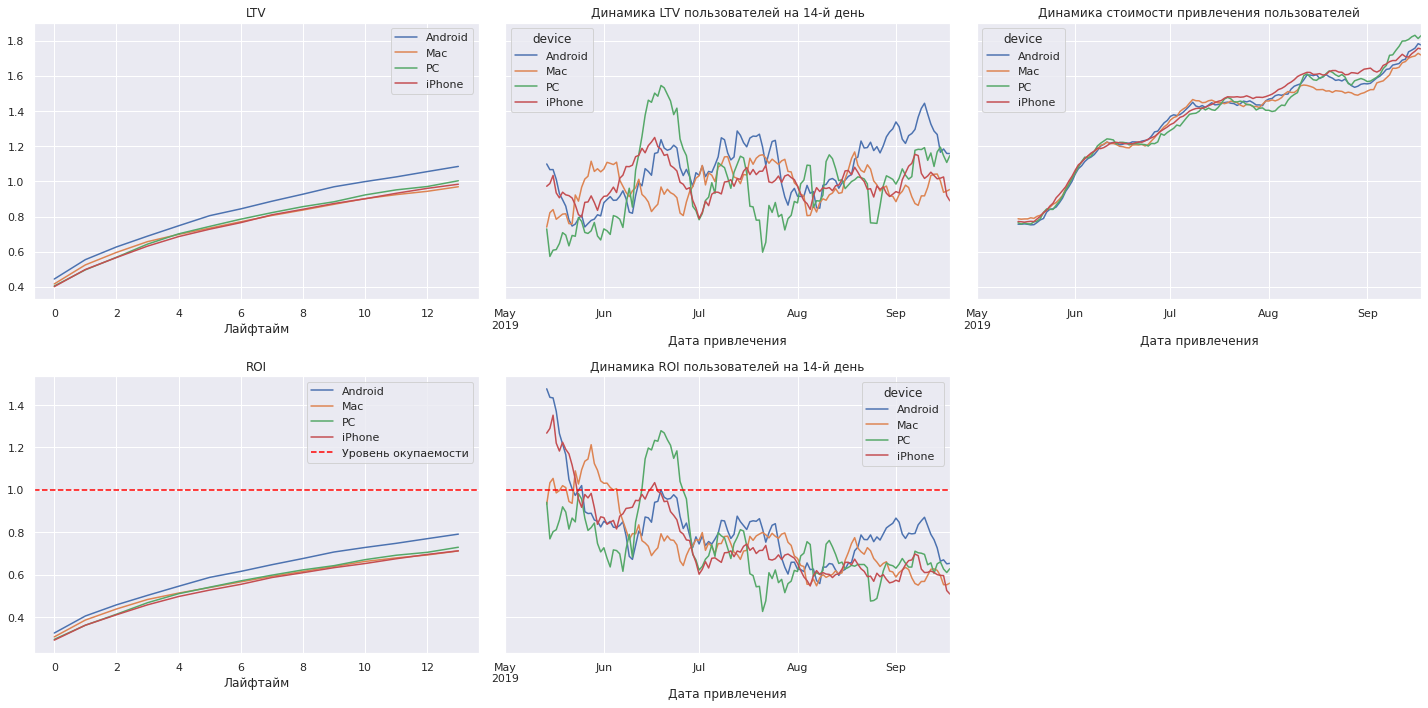

In [49]:
# смотрим окупаемость пользователей из США с разбивкой по устройствам
dimensions = ['device']
profiles_US = profiles.query('region == "United States"')

tv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Вот что говорят графики:
- Реклама в США не окупается на всех устройствах.
- Стоимость привлечения в США растет и примерно одинаково на всех устройствах.
- LTV стабилен.
- Лучше всего окупается Android, Mac и iPhone хуже всего.

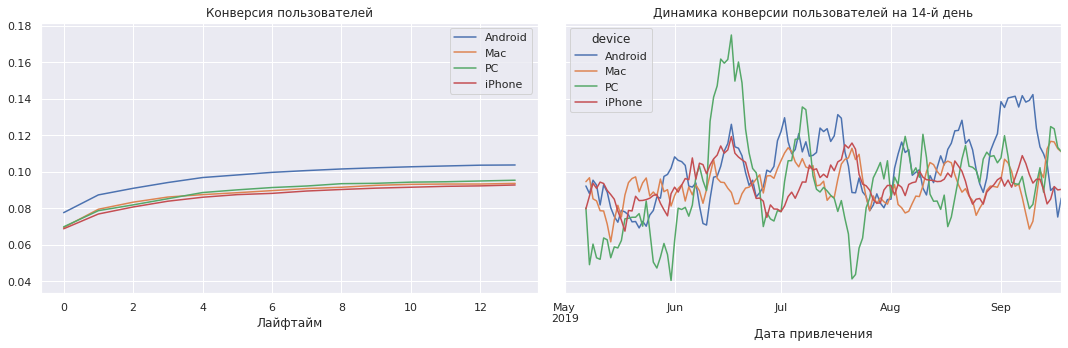

In [50]:
# смотрим конверсию пользователей из США с разбивкой по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_US, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США, с устройством Android конвертируются лучше, чем остальные пользователи с другими устройствами.

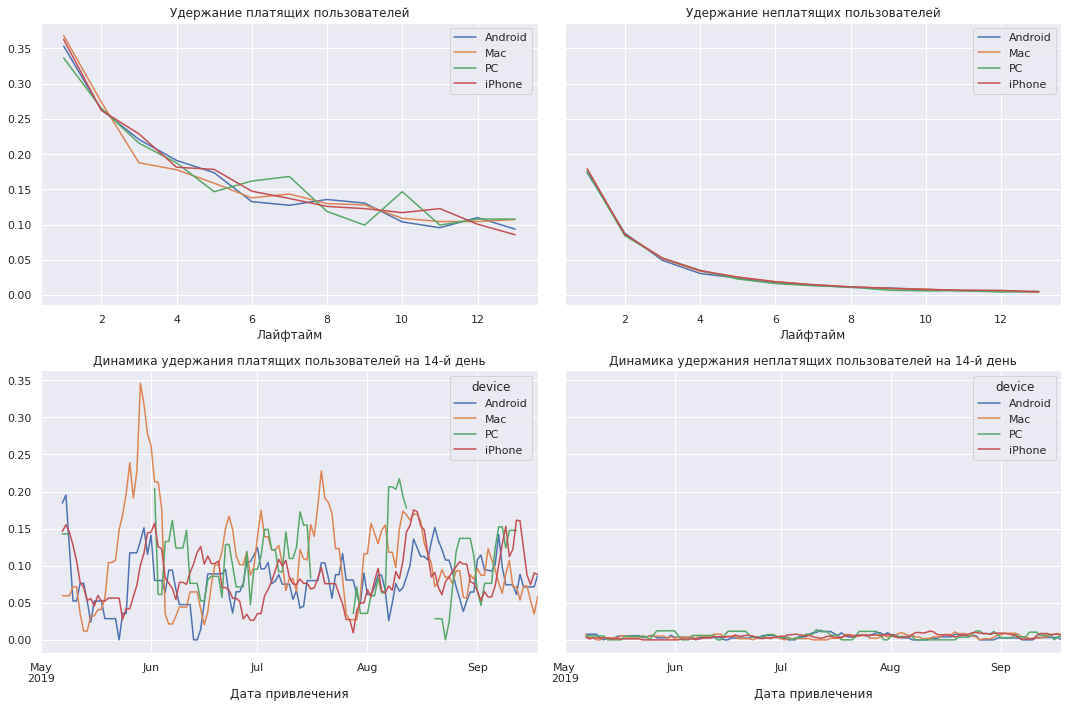

In [51]:
# смотрим удержание пользователей из США с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_US, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США удерживаются одинаково вне зависимости от устройства.

Раз все устройства убыточны, а конверсия и удержания примерно одинаковые, значит дело не в устройствах. Можно сделать вывод, что на низкую окупаемость пользователей из США не влияет устройство пользователей.

**Вывод**

Низкая окупаемость рекламы связана с низким удержанием пользователей из каналов АdNonSense и FaceBoom, а также с высокой стоимостью привлечения из канала TipTop.

Рекламному отделу нужно выяснить, почему стоимость привлечения пользователей из TipTop высокая и растет, можно ли ее снизить, а если нет, то рассмотреть возможность отказаться от этого канала и сосредоточиться на альтернативных каналах с более высоким ROI, конверсией и удержанием, поскольку реклама TipTop идет только в США, то следует рассмотреть - RocketSuperAds или YRabbit. 

Следует выяснить причины из-за которых удержание пользователей из каналов АdNonSense и FaceBoom низкое, возможно оттуда приходит не целевая аудитория, если улучшить удержание пользователей не удастся, следует также расмотреть возможность отказаться от этого канала в пользу  каналов с более высоким ROI, конверсией и удержанием - YRabbit как альтернатива FaceBoom, а для альтернативы АdNonSense можно использовать lambdaMediaAds и YRabbit.

## Общий вывод

Мы изучили данные развлекательного приложения Procrastinate Pro+, которые содержат информацию о посещениях сайта, заказах и расходах на рекламу. 

Мы выяснили откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов. Оценили окупаемость рекламы, выяснили когда расходы на привлечение клиента окупаются и какие факторы мешают окупаемости рекламы.



**Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей?**

Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего зарегистрировано пользователей из США, среди них также самая большая доля платящих, 6,9%. У остальных стран доля платящих около 4%.

**Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи?**

Клиенты пользуются устройствами Mac, iPhone, Android и PC. Больше всего доля платящих у клиентов, которые пользуются Mac - 6,4%. Меньше всего у тех клиентов, которые пользуются PC - 5%

**Каналы, из которых пришло больше всего платящих пользователей**

Больше всего платящих пользователей пришло из FaceBoom, около 12%. На втором месте AdNonSense, около 11%. Замыкает тройку лидеров lambdaMediaAds, около 10%. Меньше всего платящих пользователей приходит из каналов organic, OppleCreativeMedia, LeapBob.

**Общая сумма расходов на маркетинг** - 105497.3 долларов

**Распределение трат по рекламным источникам**

Траты на TipTop и FaceBoom существенно превышают траты на остальные источники и растут со временем. Траты на остальные источники остаются стабильно низкими. 

**Стоимость привлечение одного пользователя**

Средний CAC по проекту: 0.687

Стоимость привлечения одного пользователя (CAC) меньше всего в источнике organic, LeapBob, MediaTornado, YRabbit, около 0,2. Самое большая САС в источниках TipTop - 2,7, FaceBoom - 1,1, AdNonSense - 1.	

**Окупается ли реклама, направленная на привлечение пользователей в целом?**
- Реклама не окупается. ROI в конце срока — чуть выше 80%.
- Стоимость привлечения увеличивается.

**Что оказывает негативное влияние на окупаемость рекламы?**

Низкая окупаемость рекламы связана с низким удержанием пользователей из каналов АdNonSense и FaceBoom, а также с высокой стоимостью привлечения из канала TipTop. При этом реклама FaceBoom и TipTop идет только в США, что негативно сказывается на окупаемости рекламы в этой стране.

**Рекомендации для отдела маркетинга**

Рекламному отделу нужно выяснить, почему стоимость привлечения пользователей из TipTop высокая и растет, можно ли ее снизить, а если нет, то рассмотреть возможность отказаться от этого канала и сосредоточиться на альтернативных каналах с более высоким ROI, конверсией и удержанием, поскольку реклама TipTop идет только в США, то следует рассмотреть - RocketSuperAds или YRabbit. 

Следует выяснить причины из-за которых удержание пользователей из каналов АdNonSense и FaceBoom низкое, возможно оттуда приходит не целевая аудитория, если улучшить удержание пользователей не удастся, следует также расмотреть возможность отказаться от этого канала в пользу  каналов с более высоким ROI, конверсией и удержанием - YRabbit как альтернатива FaceBoom, а для альтернативы АdNonSense можно использовать lambdaMediaAds и YRabbit.
